<a href="https://colab.research.google.com/github/daniel020901/Dataset-Capstone/blob/master/LSTM_autoencoder_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

##**Load Dataset**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/daniel020901/Dataset-Capstone/master/Daily%20Household%20Transactions.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [4]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


###**Transform Data**

In [5]:
df = pd.DataFrame(data)

# Ubah tipe data


df['Mode'] = df['Mode'].astype('category')  # Ubah ke kategori
df['Category'] = df['Category'].astype('category')  # Ubah ke kategori
df['Subcategory'] = df['Subcategory'].astype('category')  # Ubah ke kategori
df['Income/Expense'] = df['Income/Expense'].astype('category')  # Ubah ke kategori
df['Currency'] = df['Currency'].astype('category')  # Ub

In [6]:
df['Date'] = df['Date'].str.replace(r'\s\d{2}:\d{2}(:\d{2})?', '', regex=True)

# Mengubah kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')



In [7]:
df.info()
print("Jumlah duplikasi: ",df.duplicated().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2461 non-null   datetime64[ns]
 1   Mode            2461 non-null   category      
 2   Category        2461 non-null   category      
 3   Subcategory     1826 non-null   category      
 4   Note            1940 non-null   object        
 5   Amount          2461 non-null   float64       
 6   Income/Expense  2461 non-null   category      
 7   Currency        2461 non-null   category      
dtypes: category(5), datetime64[ns](1), float64(1), object(1)
memory usage: 75.7+ KB
Jumlah duplikasi:  11


,Date,Amount
count,2461,2461.000000
mean,2017-04-03 17:00:27.793579776,2751.145380
min,2015-01-01 00:00:00,2.000000
25%,2016-10-22 00:00:00,35.000000
50%,2017-06-25 00:00:00,100.000000
75%,2018-01-15 00:00:00,799.000000
max,2018-09-20 00:00:00,250000.000000
std,NaN,12519.615804


In [8]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [9]:
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


### **Cleansing data**
  Dilakukan proses pembersihan data untuk memastikan kolom Amount memiliki nilai valid dan dapat dianalisis. Langkah-langkah yang dilakukan adalah sebagai berikut:



1.   Membersihkan kolom Amount:


*   Koma (,) dan spasi ( ) dalam nilai harga dihapus menggunakan replace() dengan parameter regex=True.
*   Nilai dalam kolom harga dikonversi menjadi tipe numerik menggunakan pd.to_numeric(). Nilai yang tidak valid secara otomatis diubah menjadi NaN dengan parameter errors='coerce'.


2.   Mengisi values yang hilang pada kolom sub-category:

*   Memberikan keterangan jika nilai kosong dengan tidak diketahui







In [10]:
data['Amount'] = data['Amount'].replace({',': '', ' ': ''}, regex=True)
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

In [11]:
# Menambahkan kategori baru 'Tidak Diketahui' ke dalam kolom 'Subcategory'
df['Subcategory'] = df['Subcategory'].cat.add_categories('Tidak Diketahui')

# Sekarang isi nilai yang hilang dengan 'Tidak Diketahui'
df['Subcategory'].fillna('Tidak Diketahui', inplace=True)

# Memeriksa hasilnya
print(df['Subcategory'].value_counts())


Subcategory
Tidak Diketahui    635
Milk               162
auto               142
snacks             115
Grocery            113
                  ... 
makeup               1
School supplies      1
ropeway              1
Books                1
OTT Platform         1
Name: count, Length: 91, dtype: int64


<ipython-input-11-526075f88bef>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subcategory'].fillna('Tidak Diketahui', inplace=True)


In [12]:
# Mengisi nilai yang hilang di kolom 'Subcategory' dengan 'Tidak Diketahui'
df['Subcategory'].fillna('Tidak Diketahui', inplace=True)

# Mengisi nilai yang hilang di kolom 'Note' dengan 'Tanpa Keterangan'
df['Note'].fillna('Tanpa Keterangan', inplace=True)

# Mengecek setelah pengisian nilai yang hilang
print(df.isnull().sum())


Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64


<ipython-input-12-4efcec691eff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subcategory'].fillna('Tidak Diketahui', inplace=True)
<ipython-input-12-4efcec691eff>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [13]:
# Mengganti nilai 'Transfer-Out' menjadi 'Expense' pada kolom 'Income/Expense'
df['Income/Expense'] = df['Income/Expense'].replace('Transfer-Out', 'Expense')

# Memeriksa hasil perubahan
print(df['Income/Expense'].value_counts())


Income/Expense
Expense    2336
Income      125
Name: count, dtype: int64


<ipython-input-13-c22db463799a>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Income/Expense'] = df['Income/Expense'].replace('Transfer-Out', 'Expense')


In [14]:
data.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


In [15]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


## **Penjelasan Variabel**


1.   **Date**
* **Tipe:** datetime64[ns]
* **Deskripsi:** Menyimpan tanggal dan waktu transaksi yang tercatat. Formatnya adalah YYYY-MM-DD HH:MM:SS (misalnya, 2018-09-20 12:04:08). Kolom ini digunakan untuk menunjukkan kapan transaksi terjadi, yang penting untuk analisis berbasis waktu seperti tren bulanan atau tahunan.
2.   **Mode**
* **Tipe:** category
* **Deskripsi:** Menyimpan cara pembayaran atau metode transaksi yang digunakan, misalnya Cash, Credit Card, Debit, atau Bank Transfer. Kolom ini membantu mengkategorikan transaksi berdasarkan metode pembayaran yang digunakan.
3. **Category**
* **Tipe:** category
* **Deskripsi:** Menyimpan kategori utama pengeluaran atau pendapatan, seperti Transportation, Food, Subscription, dan sebagainya. Kolom ini digunakan untuk mengelompokkan transaksi dalam kategori umum yang memudahkan analisis pengeluaran atau pemasukan.
4. **Subcategory**
* **Tipe:** category
* **Deskripsi:** Menyimpan subkategori lebih spesifik dari kategori utama. Misalnya, dalam kategori Food, subkategori bisa berupa snacks, groceries, atau dining. Kolom ini memberikan detail lebih lanjut tentang jenis transaksi di dalam kategori tersebut.
5. **Note**
* **Tipe:** object
* **Deskripsi:** Menyimpan deskripsi atau catatan tambahan terkait transaksi. Kolom ini biasanya berisi informasi lebih rinci atau keterangan mengenai transaksi, seperti "Idli medu Vada mix 2 plates" atau "Ganesh idol". Data ini sering kali digunakan untuk memberikan konteks lebih lanjut bagi transaksi yang tercatat.
6. **Amount**
* **Tipe:** float64
* **Deskripsi:** Menyimpan jumlah uang yang terkait dengan transaksi. Nilai dalam kolom ini menunjukkan besarnya pengeluaran atau pemasukan yang tercatat, dan biasanya berupa angka desimal (misalnya, 30.0, 199.0). Data ini penting untuk perhitungan total pengeluaran atau pemasukan.
7. **Income/Expense**
* **Tipe:** category
* **Deskripsi:** Menyimpan tipe transaksi apakah itu Income (pendapatan) atau Expense (pengeluaran). Kolom ini membantu dalam mengkategorikan transaksi sebagai pemasukan atau pengeluaran yang berguna untuk analisis keuangan.
8. **Currency**
* **Tipe:** category
* **Deskripsi:** Menyimpan mata uang yang digunakan dalam transaksi, seperti INR, IDR, atau EUR. Kolom ini membantu dalam menentukan mata uang yang digunakan dalam transaksi, yang penting ketika melakukan analisis lintas negara atau konversi mata uang.

## **Visualisasi Data**



**1.   Fitur perbandingan antara Income dan Expense per bulan**




In [16]:
df['Date'].min(), df['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2018-09-20 00:00:00'))

In [17]:
start_date = '2015-01-01'
end_date = '2018-09-20'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [18]:
# Menambahkan kolom 'Year-Month' untuk mengelompokkan data per bulan
df_filtered['Year-Month'] = df_filtered['Date'].dt.to_period('M')

# Group by Year-Month dan Income/Expense, kemudian sum Amount
df_grouped = df_filtered.groupby(['Year-Month', 'Income/Expense'])['Amount'].sum().unstack(fill_value=0)


<ipython-input-18-90f5021943d5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered.groupby(['Year-Month', 'Income/Expense'])['Amount'].sum().unstack(fill_value=0)


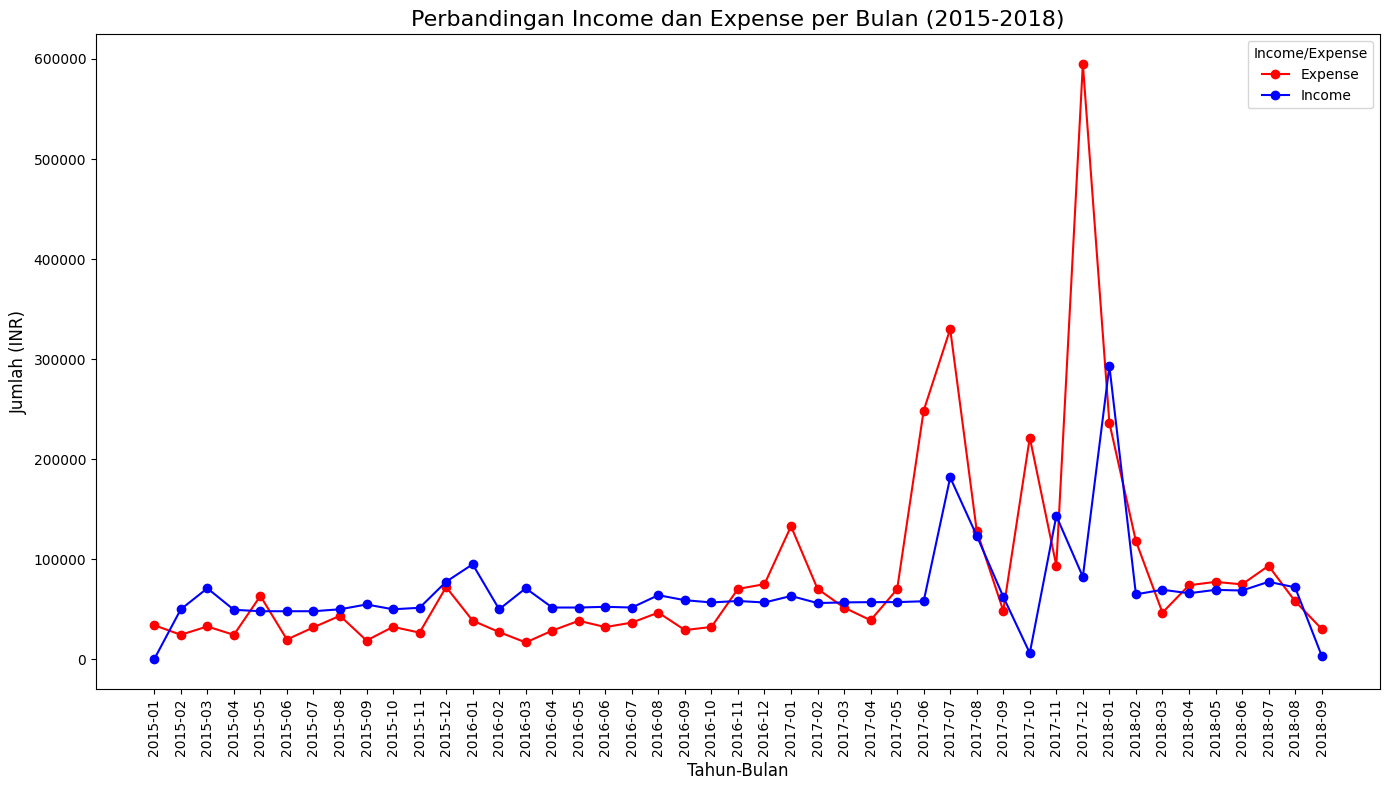

In [19]:
# Plot hasil perbandingan Income dan Expense dengan line chart
plt.figure(figsize=(14, 8))
plt.plot(df_grouped.index.astype(str), df_grouped['Expense'], label='Expense', color='red', marker='o')
plt.plot(df_grouped.index.astype(str), df_grouped['Income'], label='Income', color='blue', marker='o')

# Menambahkan judul dan label
plt.title('Perbandingan Income dan Expense per Bulan (2015-2018)', fontsize=16)
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Jumlah (INR)', fontsize=12)

# Menambahkan legenda
plt.legend(title='Income/Expense')

# Mengatur tampilan agar tidak terpotong
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()


### **Filter dataframe berdasarkan Date, Amount, Income/Expense yang hanya bernilai Expense**

1. Mengkonversi mata uang `INR` ke dalam bentuk `IDR` untuk kebutuhan aplikasi

In [20]:
# Filter baris yang hanya memiliki nilai 'Expense' di kolom 'Income/Expense'
expense_df = df[df['Income/Expense'] == 'Expense']

# Memilih hanya kolom 'Date', 'Income/Expense', dan 'Amount'
expense_df = expense_df[['Date', 'Income/Expense', 'Amount']]

# Menampilkan hasil
print(expense_df.head())


        Date Income/Expense  Amount
0 2018-09-20        Expense    30.0
1 2018-09-20        Expense    60.0
2 2018-09-19        Expense   199.0
3 2018-09-17        Expense    19.0
4 2018-09-16        Expense   251.0


In [21]:
# Tentukan nilai tukar INR ke IDR
nilai_tukar = 187.60  # 1 INR = 187.60 IDR

# Mengonversi kolom 'Amount' dari INR ke IDR dan menggantinya di kolom yang sama
expense_df['Amount'] = expense_df['Amount'] * nilai_tukar

# Menampilkan data setelah konversi
print(expense_df[['Date', 'Amount']].head())


        Date   Amount
0 2018-09-20   5628.0
1 2018-09-20  11256.0
2 2018-09-19  37332.4
3 2018-09-17   3564.4
4 2018-09-16  47087.6


In [22]:
print(expense_df.head())

        Date Income/Expense   Amount
0 2018-09-20        Expense   5628.0
1 2018-09-20        Expense  11256.0
2 2018-09-19        Expense  37332.4
3 2018-09-17        Expense   3564.4
4 2018-09-16        Expense  47087.6


## **Data Preprocessing**

**1.   Normalisasi Data**




In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
expense_df['Amount'] = scaler.fit_transform(expense_df[['Amount']])

In [24]:
print(expense_df.head())

        Date Income/Expense    Amount
0 2018-09-20        Expense  0.000112
1 2018-09-20        Expense  0.000232
2 2018-09-19        Expense  0.000788
3 2018-09-17        Expense  0.000068
4 2018-09-16        Expense  0.000996





**3.  Time Sequences**

*   Membuat time squences dengan `sequence_length` nilai data yang berdekatan dari `train_data`
*   `sequence_length` ditetapkan selama 30 hari





In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Menyortir data berdasarkan tanggal
expense_df = expense_df.sort_values(by='Date')

# Menggunakan hanya kolom 'Amount' untuk LSTM
amount_data = expense_df['Amount'].values

# Fungsi untuk membuat sequence data
def create_sequence(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

# Menentukan panjang sequence
sequence_length = 30  # 30 hari berturut-turut untuk setiap input sequence
sequences = create_sequence(amount_data, sequence_length)

# Membagi data menjadi training dan testing (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
train_data, test_data = sequences[:train_size], sequences[train_size:]

# Membagi menjadi input (X) dan output (y)
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Menyesuaikan dimensi input untuk LSTM: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Output untuk verifikasi
print(f'Train data shape: {X_train.shape}, {y_train.shape}')
print(f'Test data shape: {X_test.shape}, {y_test.shape}')


Train data shape: (1844, 29, 1), (1844,)
Test data shape: (462, 29, 1), (462,)


**2. Train- test split**

*   Membagi data menjadi train (80%) dan test (20%) untuk evaluasi model nanti.




In [26]:
train_data[0]

array([3.20002560e-05, 1.59201274e-03, 7.20005760e-05, 2.32001856e-04,
       1.52001216e-04, 3.20002560e-05, 5.60004480e-04, 1.12000896e-04,
       7.92006336e-04, 7.20005760e-05, 7.20005760e-05, 1.04000832e-04,
       2.56002048e-04, 3.20002560e-05, 3.99923199e-02, 1.88001504e-04,
       1.39201114e-03, 8.84007072e-04, 3.99923199e-02, 6.92005536e-04,
       7.20005760e-05, 1.32001056e-04, 8.99207194e-03, 5.32004256e-04,
       1.32401059e-03, 1.13240906e-02, 5.20004160e-05, 5.20004160e-05,
       1.16000928e-04, 7.20005760e-05])

Nilai-nilai seperti ini (misalnya `3.20002560e-05`, `1.59201274e-03`, `7.20005760e-05`) adalah hasil dari normalisasi menggunakan `MinMaxScaler`, yang mengubah nilai pengeluaran menjadi skala antara 0 dan 1. Nilai ini tergolong sangat kecil, dan ini adalah hal yang diharapkan dari `MinMaxScaler` jika data asli memiliki rentang nilai yang lebih besar.

In [81]:
np.random.seed(42)
tf.random.set_seed(42)

## **Build a model**


*   Kami akan membangun model Autoencoder LSTM. Model akan mengambil masukan berbentuk (`batch_size`, `sequence_length`, `num_features`) dan mengembalikan keluaran dengan bentuk yang sama. Dalam hal ini, `sequence_length` adalah 30 dan `num_features` adalah 1.




In [82]:
print(X_train.shape)


(1844, 29, 1)


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()

# Encoder dengan regularisasi L2
model.add(LSTM(50, activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2]),
               return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(rate=0.2))

model.add(LSTM(24, activation='sigmoid', return_sequences=False, kernel_regularizer=l2(0.001)))
model.add(Dropout(rate=0.3))

# Repeat Vector
model.add(RepeatVector(X_train.shape[1]))

# Decoder
model.add(LSTM(12, activation='sigmoid', return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(rate=0.3))

model.add(TimeDistributed(Dense(X_train.shape[2])))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.003), loss='mse')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 29, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 29, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 24)                  │           7,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 29, 24)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 29, 12)              │           1,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 29, 12)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 29, 1)               │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,389 (75.74 KB)

 Trainable params: 19,389 (75.74 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

# Melatih model
history = model.fit(
    X_train,  # Data training (sequences)
    X_train,  # Target sama dengan input karena Autoencoder
    epochs=20,  # Mengurangi jumlah epochs untuk mempercepat eksperimen
    batch_size=32,  # Batch size tetap sesuai
    validation_split=0.2,  # Menggunakan 20% dari data training untuk validasi
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, mode='min')  # Berhenti jika validasi loss tidak membaik
    ],
    shuffle=False  # Memastikan urutan data dipertahankan untuk data time-series
)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.1256 - val_loss: 0.0291
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0217 - val_loss: 0.0130
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0090 - val_loss: 0.0096
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0059 - val_loss: 0.0084
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0046 - val_loss: 0.0077
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0038 - val_loss: 0.0073
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0033 - val_loss: 0.0070
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0029 - val_loss: 0.0068
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0027 - val_loss: 0.0066
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0023 - val_loss: 0.0065
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0021 - val_loss: 0.0064
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0

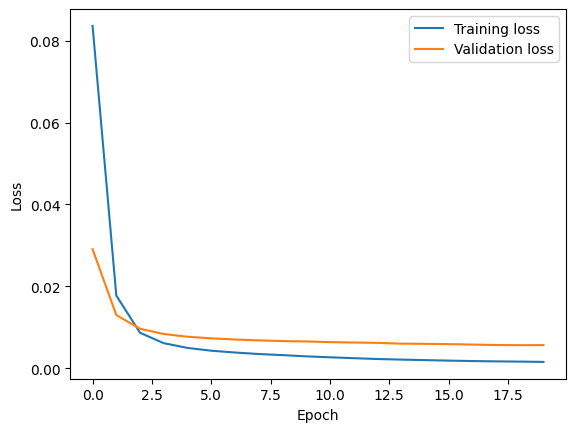

In [85]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Reconstruction error threshold: 0.03028227504322112


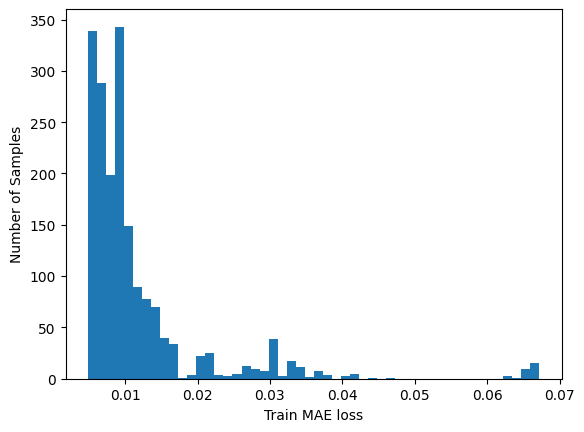

In [92]:
# Mean Absolute Error loss
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

# Set reconstruction error threshold
threshold = np.percentile(train_mae_loss, 95)

print('Reconstruction error threshold:',threshold)

## **Predict anomaly berdasarkan test_data menggunakan treshold**

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0, 0.5, 'Number of samples')

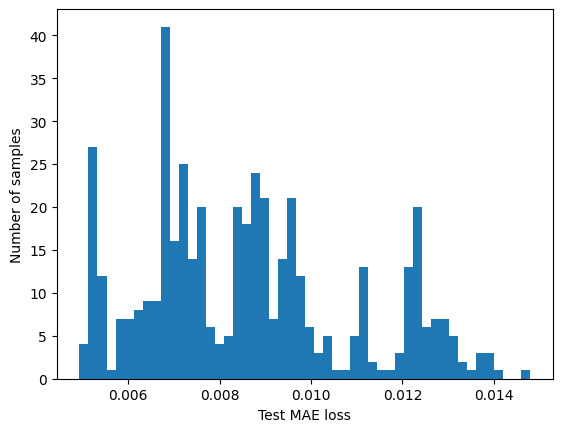

In [93]:
X_test_pred = model.predict(X_test, verbose=1)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

In [94]:
# Menentukan anomali dengan threshold berdasarkan persentil ke-90
anomaly_percentile = train_mae_loss > threshold


# Menampilkan jumlah anomali yang terdeteksi
print(f"Jumlah anomali berdasarkan persentil 90: {np.sum(anomaly_percentile)}")



Jumlah anomali berdasarkan persentil 90: 93


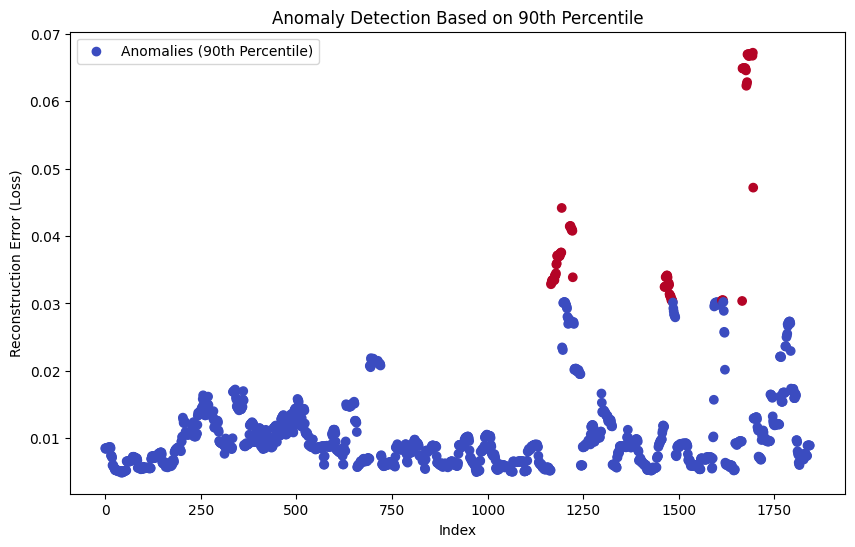

In [95]:
import matplotlib.pyplot as plt

# Plot hasil deteksi anomali berdasarkan persentil 99
plt.figure(figsize=(10, 6))
plt.scatter(range(len(train_mae_loss)), train_mae_loss, c=anomaly_percentile, cmap='coolwarm', label='Anomalies (90th Percentile)')
plt.xlabel('Index')
plt.ylabel('Reconstruction Error (Loss)')
plt.title('Anomaly Detection Based on 90th Percentile')
plt.legend()
plt.show()




In [96]:
anomaly_df = pd.DataFrame(test_data[sequence_length :])  # Hanya mengambil data setelah TIME_STEPS
anomaly_df['loss'] = test_mae_loss[sequence_length :]  # Mengambil nilai loss setelah TIME_STEPS
anomaly_df['threshold'] = threshold  # Gunakan nilai threshold yang sama untuk seluruh baris
anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']


In [97]:
test_mae_loss = test_mae_loss.flatten()


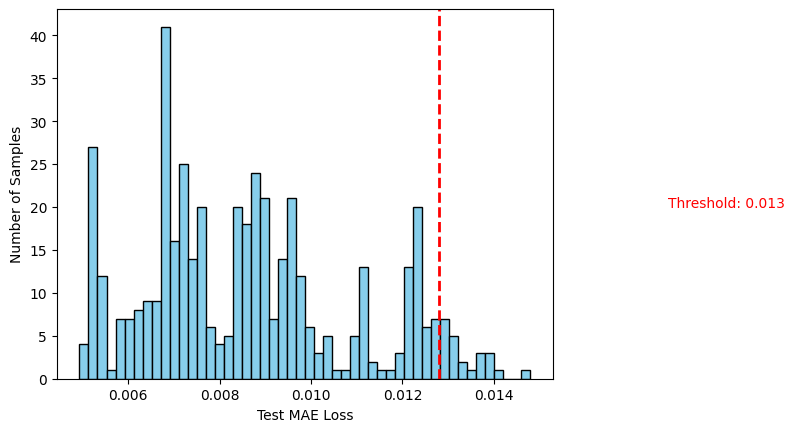

In [98]:
# Membuat histogram dari test_mae_loss
plt.hist(test_mae_loss, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Test MAE Loss')
plt.ylabel('Number of Samples')

# Menambahkan garis vertikal untuk threshold (misalnya, berdasarkan kuartil atau nilai tertentu)
threshold = np.percentile(test_mae_loss, 95)  # 95th percentile sebagai threshold
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)

# Menambahkan teks di threshold
plt.text(threshold + 0.005, 20, f'Threshold: {threshold:.3f}', color='red')

plt.show()


In [99]:
# Menurunkan threshold
threshold = 0.013

# Membuat array threshold dengan panjang yang sesuai dengan data uji
threshold_array = np.full(len(test_mae_loss), threshold)


In [100]:
# Threshold array dengan panjang sesuai data uji
threshold_array = np.full(len(test_mae_loss), threshold)

# DataFrame untuk deteksi anomali
anomaly_df = pd.DataFrame({
    'Date': expense_df['Date'][sequence_length:sequence_length + len(test_mae_loss)].values,  # Kolom Date
    'Amount': expense_df['Amount'][sequence_length:sequence_length + len(test_mae_loss)].values,  # Kolom Amount
    'loss': test_mae_loss,  # Nilai MAE Loss
    'threshold': threshold_array,  # Threshold
    'anomaly': test_mae_loss > threshold_array  # True jika anomali
})

# Lihat hasil awal
print(anomaly_df.head())


        Date    Amount      loss  threshold  anomaly
0 2015-01-09  0.000072  0.008962      0.013    False
1 2015-01-09  0.002592  0.008685      0.013    False
2 2015-01-10  0.000072  0.007998      0.013    False
3 2015-01-10  0.000192  0.007641      0.013    False
4 2015-01-10  0.002592  0.007639      0.013    False


In [101]:
anomalies = anomaly_df[anomaly_df['anomaly'] == True]
print("Anomalies detected:")
print(anomalies)


Anomalies detected:
          Date    Amount      loss  threshold  anomaly
240 2015-07-01  0.039992  0.013231      0.013     True
241 2015-07-01  0.011324  0.013635      0.013     True
242 2015-07-01  0.001324  0.013917      0.013     True
243 2015-07-02  0.001240  0.013910      0.013     True
244 2015-07-06  0.003992  0.014797      0.013     True
260 2015-08-10  0.003992  0.013175      0.013     True
384 2016-02-13  0.000312  0.013461      0.013     True
385 2016-02-13  0.000152  0.013357      0.013     True
386 2016-02-14  0.000652  0.013145      0.013     True
388 2016-02-22  0.000668  0.013016      0.013     True
389 2016-02-22  0.000152  0.013024      0.013     True
390 2016-02-24  0.000788  0.013039      0.013     True
391 2016-02-26  0.039992  0.013041      0.013     True
392 2016-02-27  0.000996  0.013006      0.013     True
393 2016-02-27  0.000992  0.013012      0.013     True
394 2016-02-27  0.000192  0.013005      0.013     True
395 2016-02-28  0.000036  0.013013      0.013

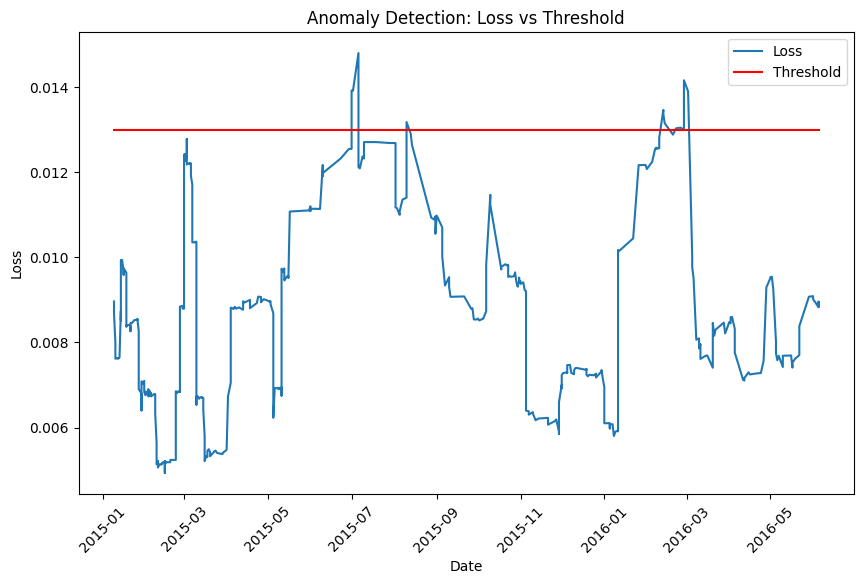

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(anomaly_df['Date'], anomaly_df['loss'], label='Loss')
plt.plot(anomaly_df['Date'], anomaly_df['threshold'], label='Threshold', color='red')
plt.xticks(rotation=45)
plt.legend()
plt.title('Anomaly Detection: Loss vs Threshold')
plt.xlabel('Date')
plt.ylabel('Loss')
plt.show()


In [103]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=anomaly_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=anomaly_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [104]:

test_labels = anomaly_df['anomaly'].map({True: 1, False: 0}).values

# Menampilkan 10 label pertama
print(test_labels[:10])  # Menampilkan 10 label pertama


[0 0 0 0 0 0 0 0 0 0]


In [105]:
print(f"Jumlah anomali berdasarkan prediksi: {np.sum(test_mae_loss > threshold)}")



Jumlah anomali berdasarkan prediksi: 21


In [106]:
# Label prediksi (1 = anomali, 0 = normal)
y_pred = (test_mae_loss > threshold).astype(int)


In [107]:
# Contoh label asli (1 = anomali, 0 = normal)
y_true = test_labels  # Label asli dari dataset uji


In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Precision
precision = precision_score(y_true, y_pred)

# Recall
recall = recall_score(y_true, y_pred)

# F1-Score
f1 = f1_score(y_true, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")


Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[441   0]
 [  0  21]]


In [110]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomalies.head()

,Date,Amount,loss,threshold,anomaly
240,2015-07-01,0.039992,0.013231,0.013,True
241,2015-07-01,0.011324,0.013635,0.013,True
242,2015-07-01,0.001324,0.013917,0.013,True
243,2015-07-02,0.001240,0.013910,0.013,True
244,2015-07-06,0.003992,0.014797,0.013,True


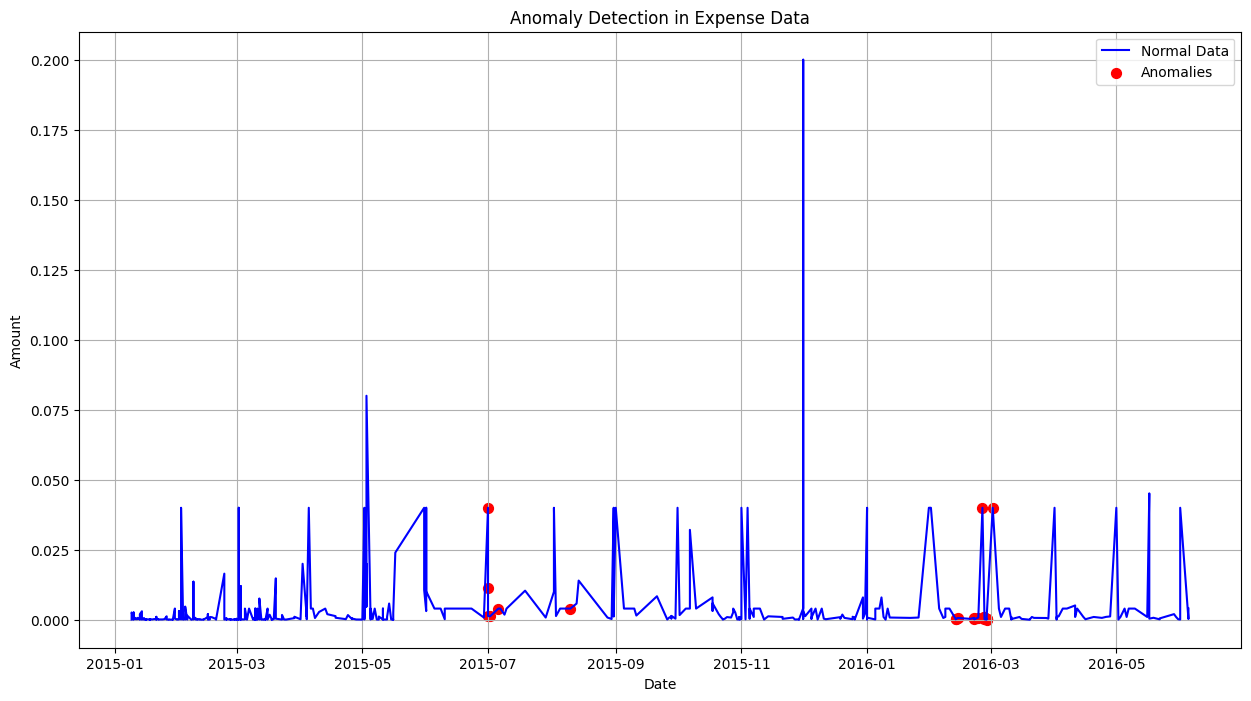

In [111]:
plt.figure(figsize=(15, 8))
plt.plot(anomaly_df['Date'], anomaly_df['Amount'], label='Normal Data', color='blue')

# Menambahkan anomaly
plt.scatter(anomalies['Date'], anomalies['Amount'], color='red', label='Anomalies', s=50)

# Label dan keterangan
plt.title('Anomaly Detection in Expense Data')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

In [112]:
model.save('model_v1.h5')  # Tambahkan versi dalam nama file
